# 📊 Customer Churn Prediction using Machine Learning

## 🔍 Project Overview

Customer retention is a critical metric for subscription-based businesses, especially in competitive markets like telecom. This project uses the **Telco Customer Churn dataset** to build predictive models that identify which customers are likely to churn, enabling proactive retention strategies.

Using a combination of **data cleaning, exploratory data analysis (EDA)**, and **machine learning models** like Logistic Regression, Random Forest, and XGBoost, we aim to:

- Understand the key drivers of customer churn
- Build an accurate classification model
- Provide actionable insights for business decision-makers

## 📁 Dataset Source

- **Dataset**: Telco Customer Churn (IBM Sample Dataset)
- **Link**: [Telco Churn on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## 🛠️ Tools and Technologies

- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost)
- Jupyter Notebook
- Git & GitHub
- (Optional for deployment) Streamlit or Flask

---

## 🧭 Project Workflow

1. Load & preprocess the dataset
2. Perform exploratory data analysis (EDA)
3. Engineer relevant features
4. Train and evaluate multiple ML models
5. Interpret results and draw business insights


## 1. Setup and Data Loading


In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models & tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# warnings and plot style
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🧾 Step 2: Dataset Overview and Initial Exploration

In [6]:
# Check shape
print(df['Churn'].value_counts(normalize=True))
print("Shape of dataset:", df.shape)

# See column names and types
df.info()

# Check for missing values
df.isnull().sum()


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   obje

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# View basic statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 3: Data Cleaning Tasks 


In [9]:
# Since TotalCharges should be a numeric column but it's stored as an object type, so we check this colum

df['TotalCharges'].value_counts().head(10)  # Check top values



TotalCharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.15     6
20.25     6
Name: count, dtype: int64

In [10]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### Few rows (around 11) where TotalCharges are ' ' — these customers have tenure = 0, i.e., just joined.

In [12]:
# Replace blank strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Confirm how many NaNs we now have
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

# Convert column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Drop rows where TotalCharges is now NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Final check
print("TotalCharges cleaned. Data type:", df['TotalCharges'].dtype)


Missing values in TotalCharges: 11
TotalCharges cleaned. Data type: float64


In [13]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)


In [14]:
# Convert 'SeniorCitizen' column from 0/1 to 'Yes'/'No' for consistency
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Define list of binary columns that contain 'Yes'/'No' values
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
               'Churn', 'SeniorCitizen']

# Map 'Yes' to 1 and 'No' to 0 in all these binary columns
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
df.select_dtypes(include='object').nunique()


gender              2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64

In [17]:
# Replace "No internet service" with "No" in all 6 columns
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
    df[col] = df[col].replace('No internet service', 'No')

# Convert 'Yes'/'No' to 1/0
for col in cols_to_clean:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [19]:
# 🧾 Check remaining object (categorical) columns
df.select_dtypes(include='object').nunique()


gender             2
MultipleLines      3
InternetService    3
Contract           3
PaymentMethod      4
dtype: int64

In [20]:
# Apply one-hot encoding to all remaining object columns
df = pd.get_dummies(df, drop_first=True).astype(int)


In [21]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## 📊 Univariate Analysis – Categorical Features

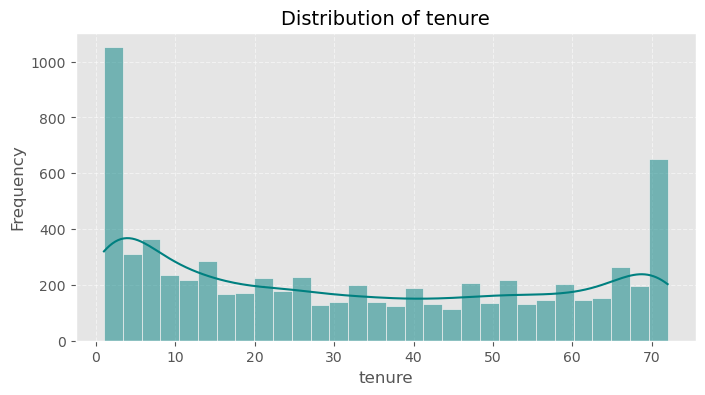

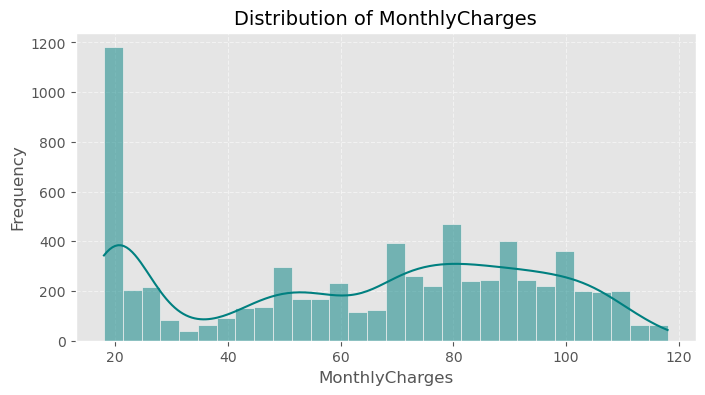

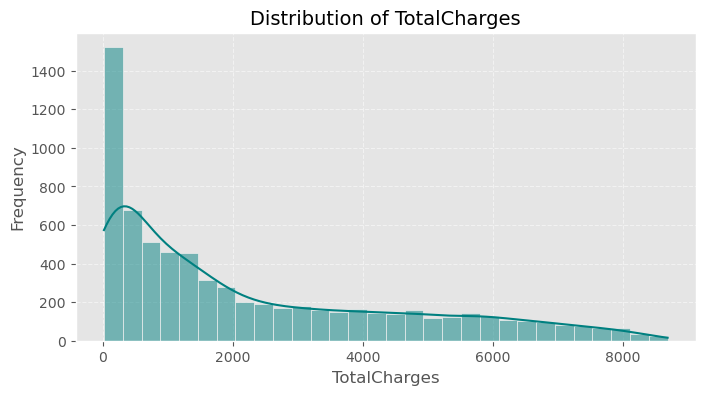

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to analyze
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through each column and plot histogram with KDE
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


#### 🔍 Insights
##### Most customers have higher total charges (i.e., have been around longer); fewer new/low-spending ones.

##### The TotalCharges distribution appears bimodal, with one peak for new customers (low charges) and another for long-term users (high charges), suggesting two distinct customer segments

##### Tenure distribution also appers to be bimodal.

## 📊 Univariate Analysis – Categorical Features

In [27]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

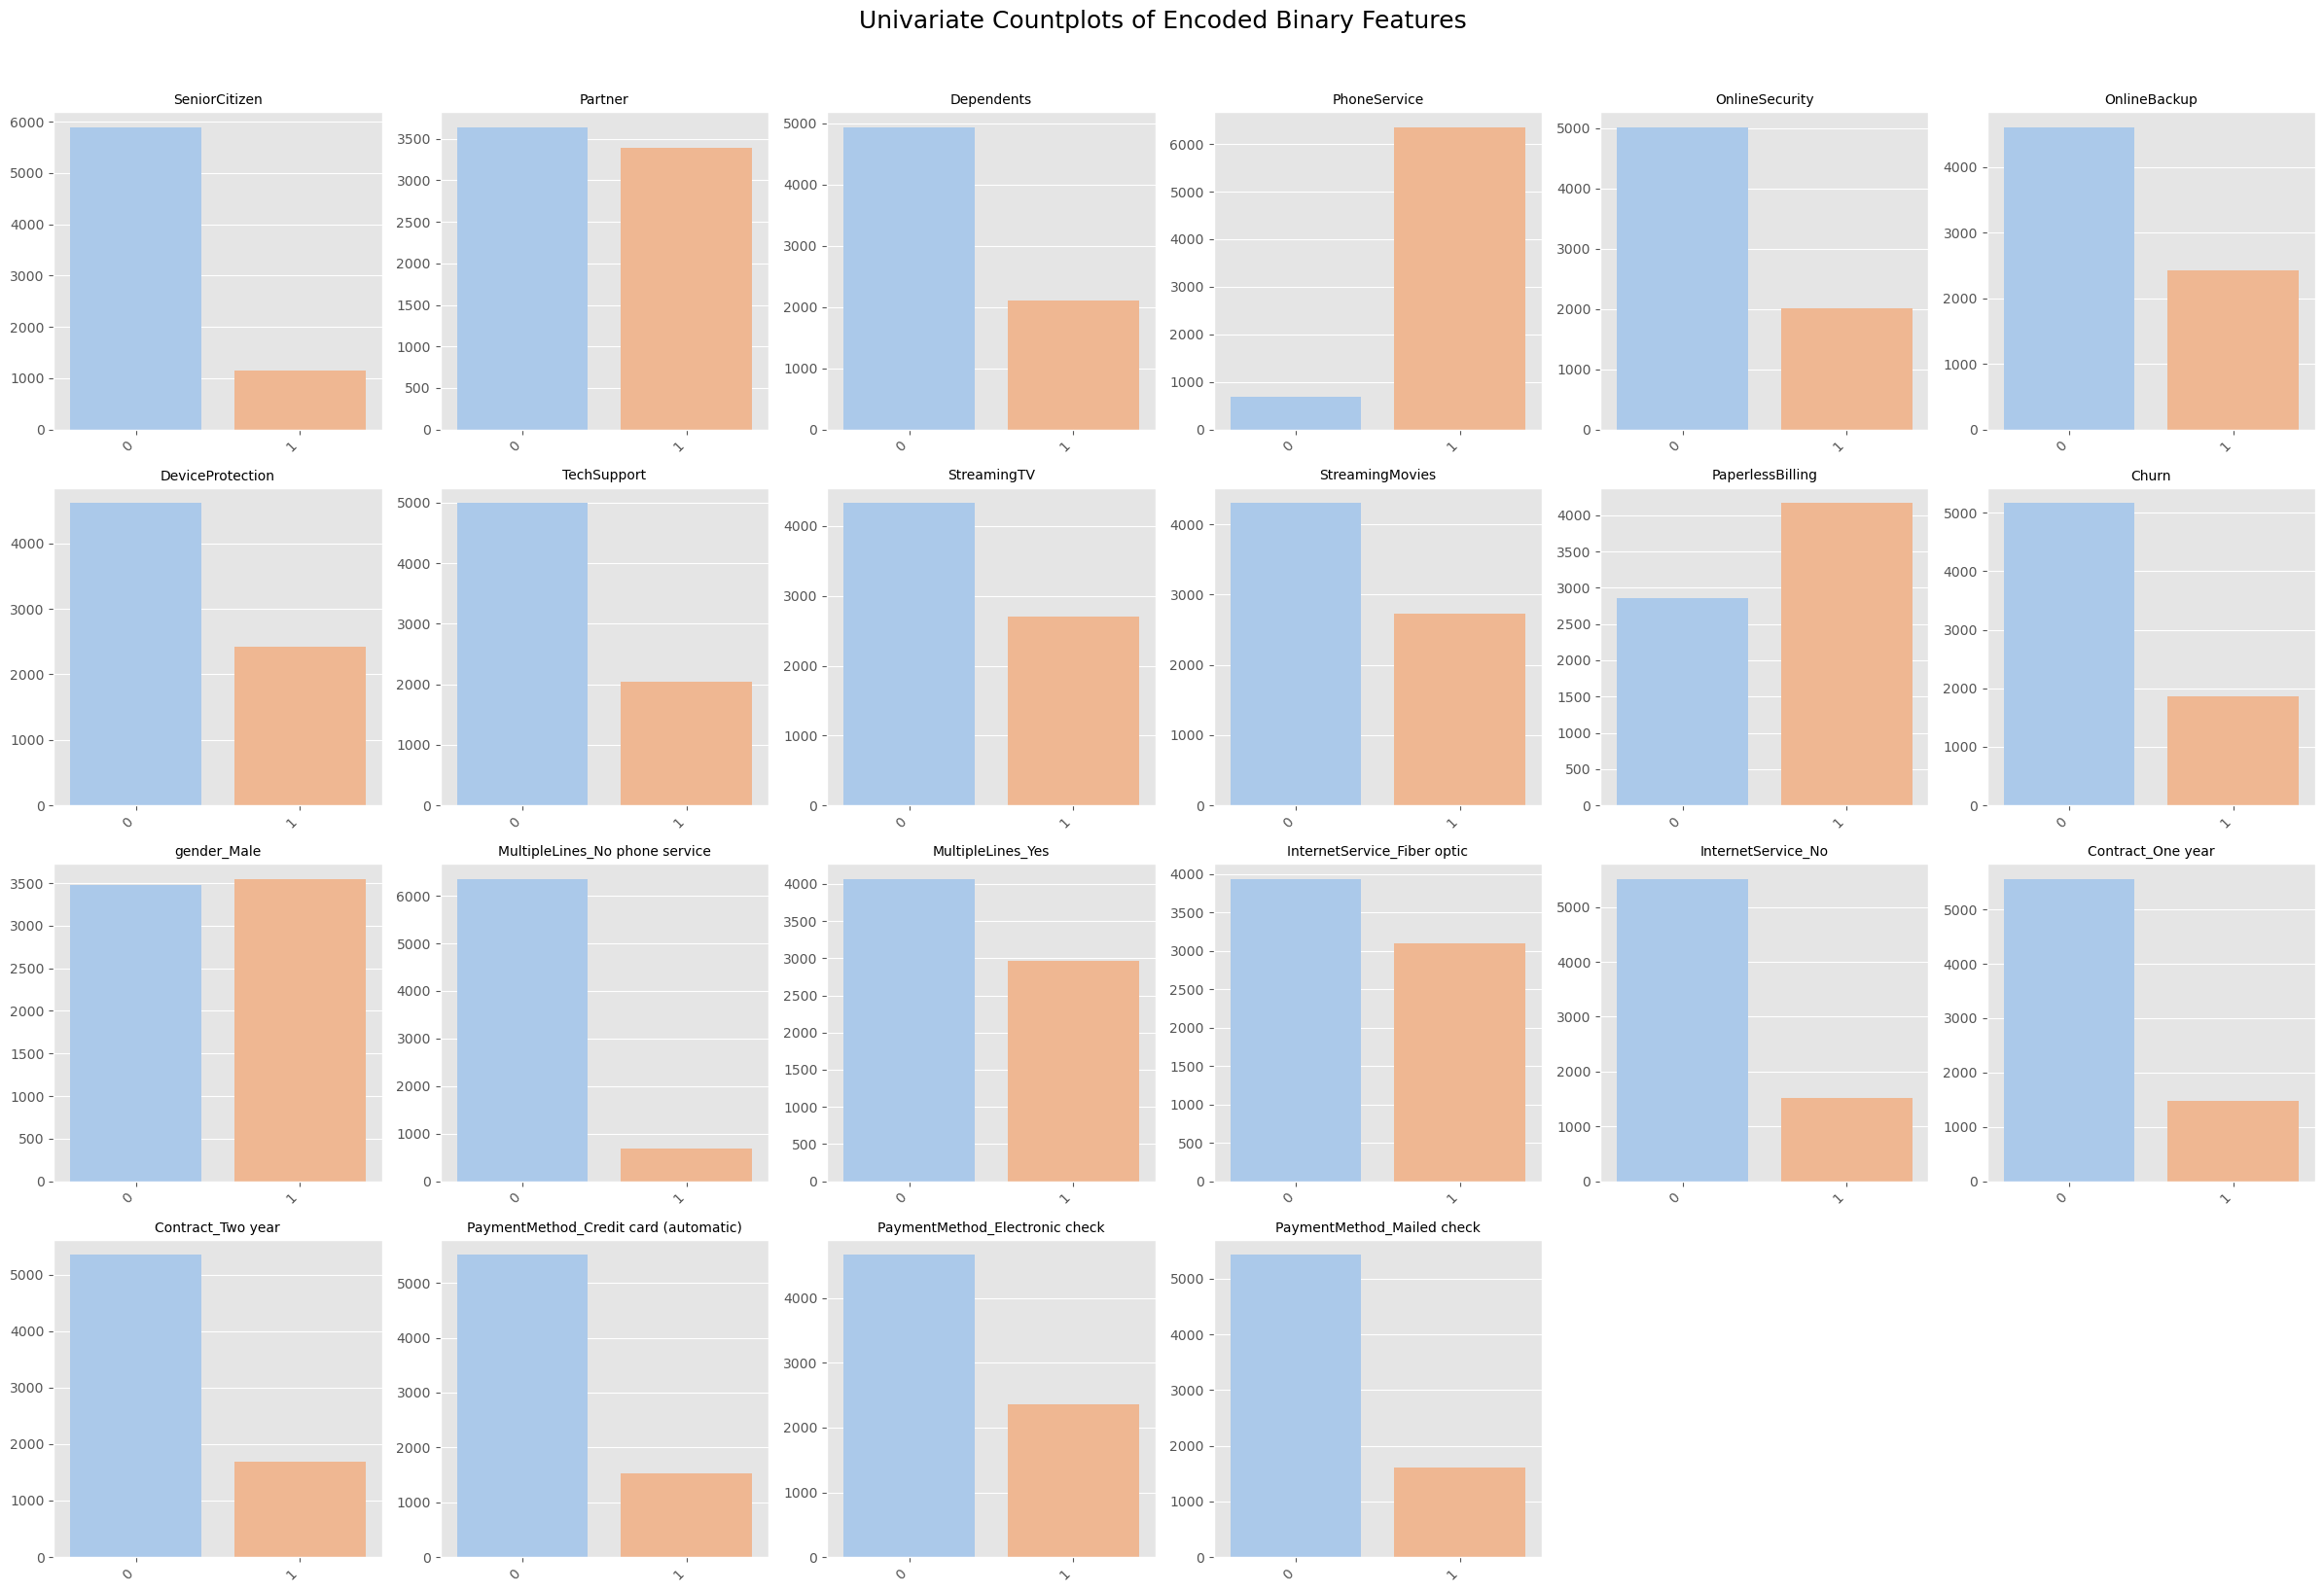

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of one-hot encoded binary columns (as per your dataset)
binary_cols = [
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn', 'gender_Male',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Create subplots: 4 rows x 6 columns
plt.figure(figsize=(24, 16))  # Width x Height
for i, col in enumerate(binary_cols, 1):
    plt.subplot(4, 6, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Univariate Countplots of Encoded Binary Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()



### 🔍 Insight: Categorical Feature Distribution

Several binary features such as `SeniorCitizen`, `Dependents`, `PhoneService`, `OnlineSecurity`, and `TechSupport` etc. show **class imbalance**, meaning one class (Yes/No or 0/1) significantly dominates the other.

This implies:
- A skew in customer behavior (e.g., most users have phone service, few are senior citizens).
- Models trained on this data might learn bias unless this imbalance is considered.

Meanwhile, features like `gendePartnerlrvice` appear **more balanced**, which reduces bias risk in those categories.


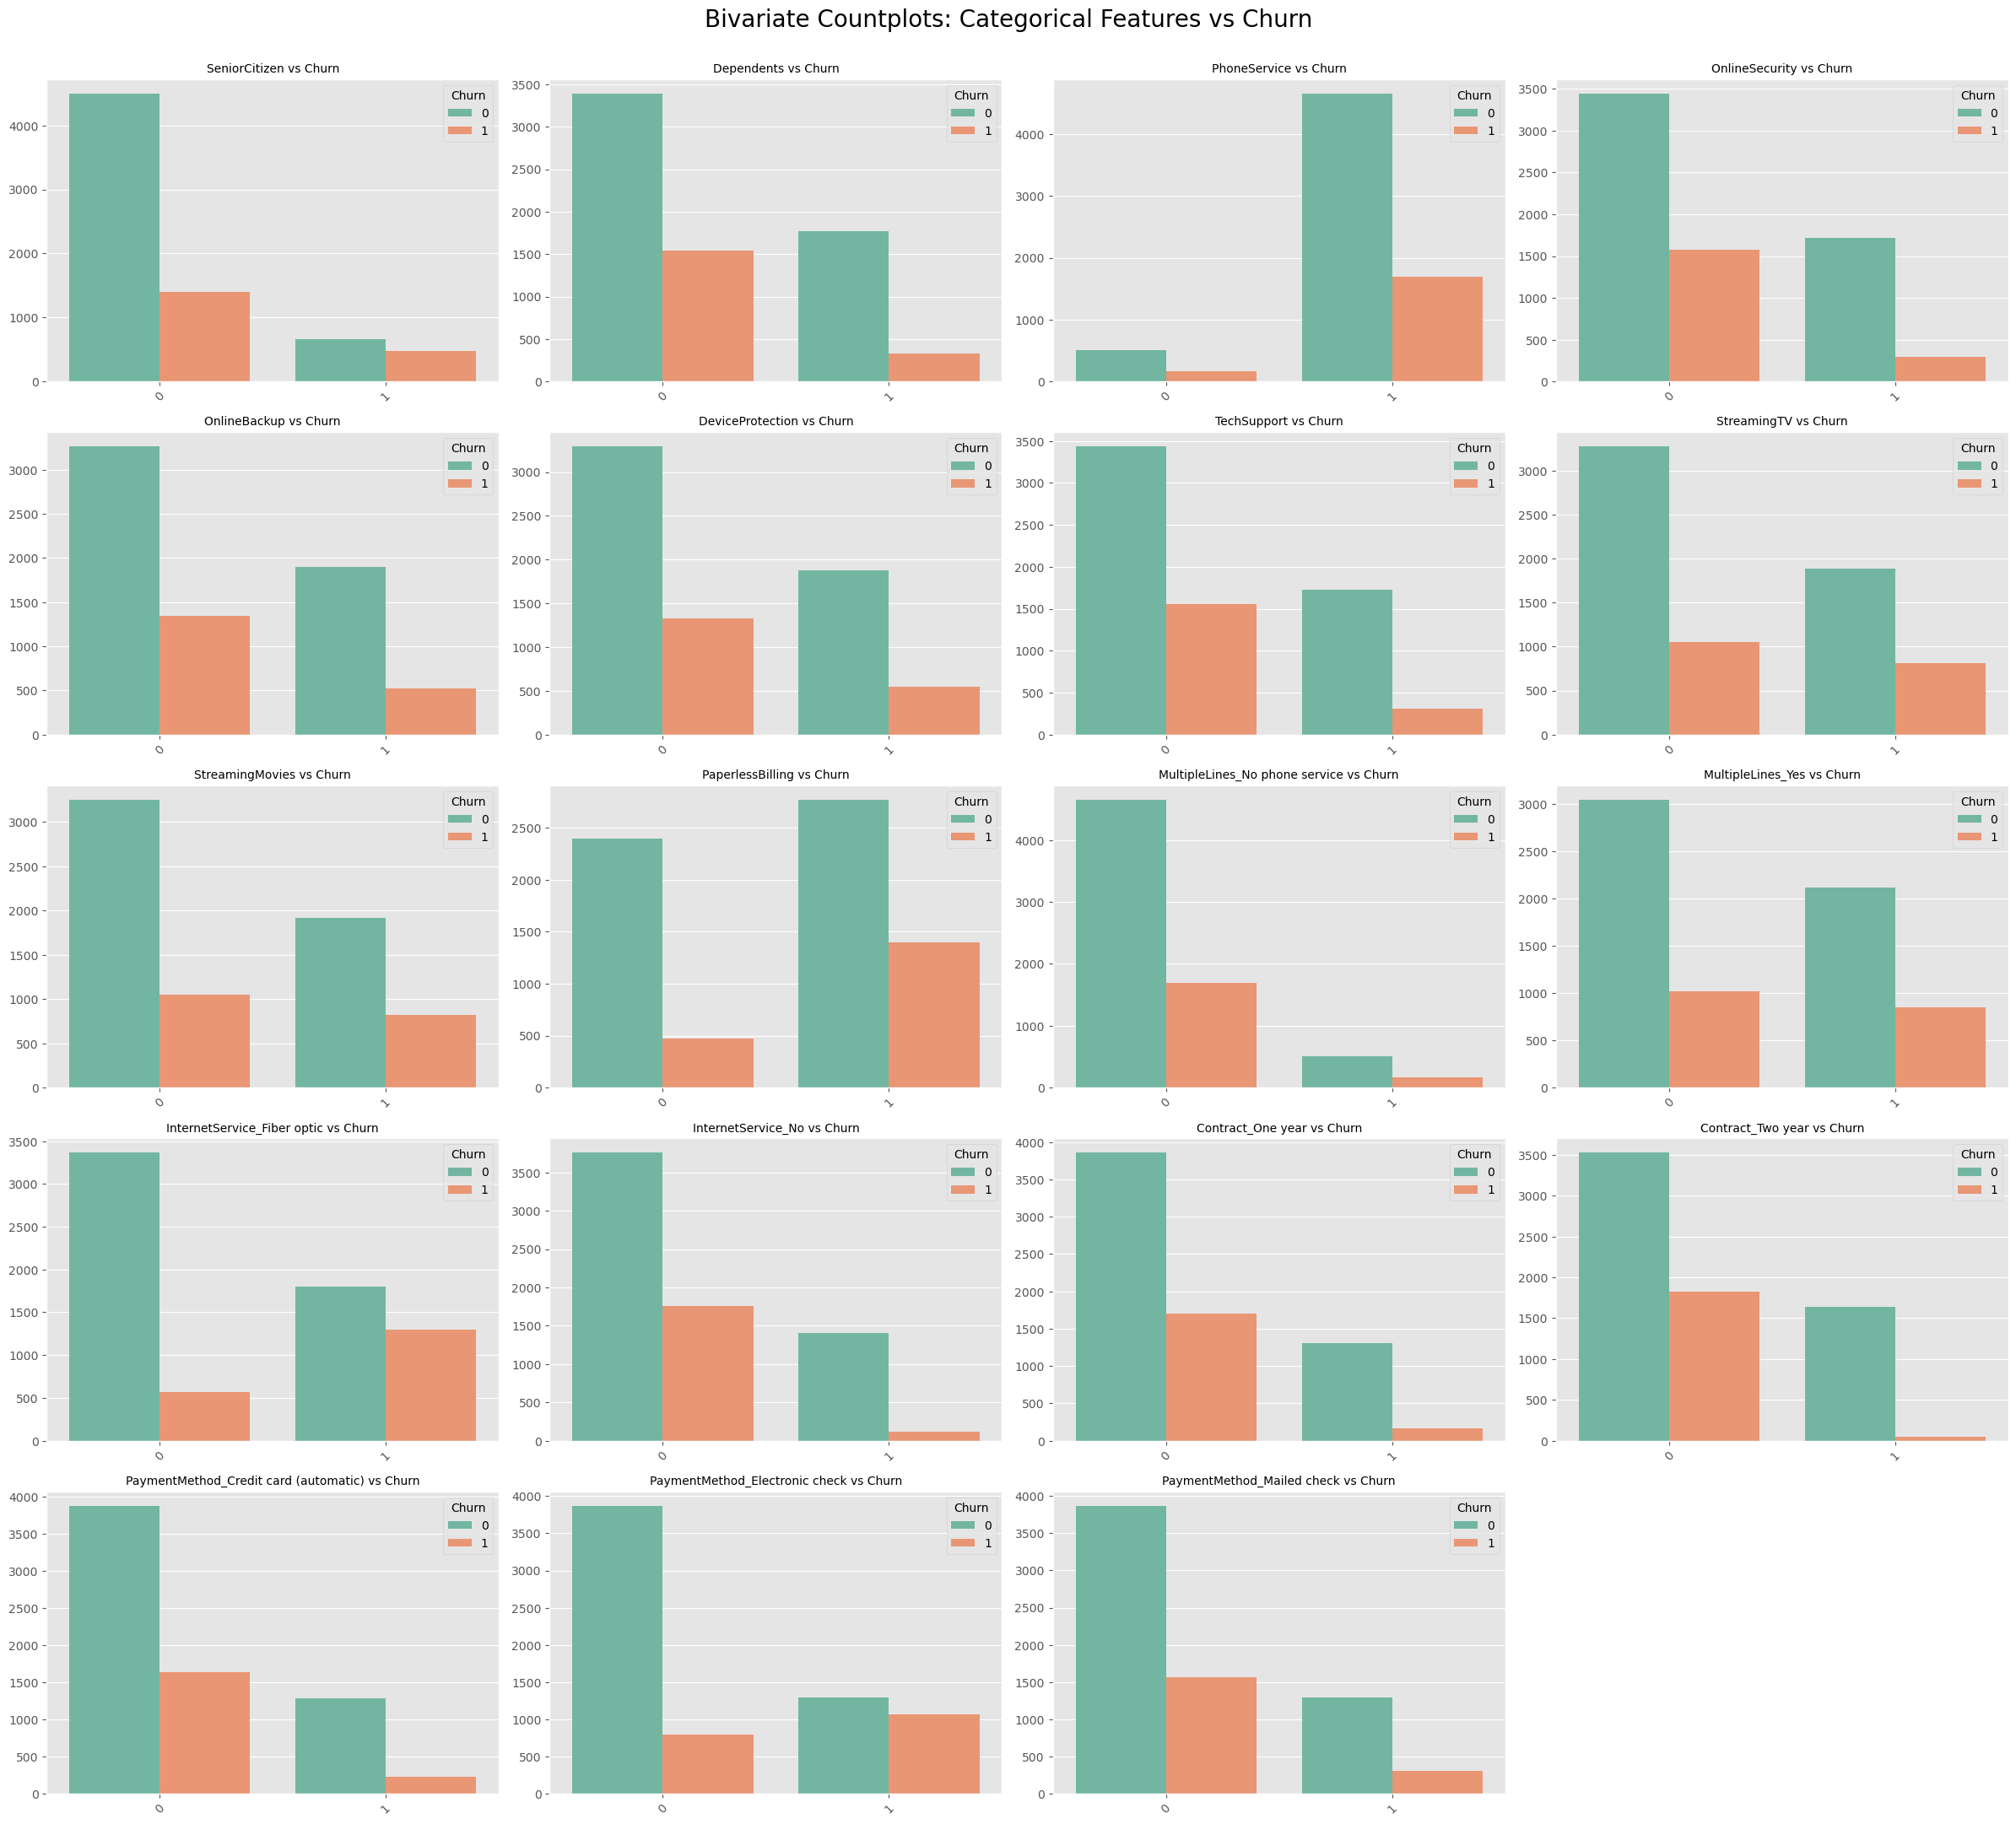

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical or one-hot encoded binary features
cat_features = [
    'SeniorCitizen', 'Dependents', 'PhoneService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

plt.figure(figsize=(24, 25))  # Adjust size for readability
for i, col in enumerate(cat_features, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=10)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Bivariate Countplots: Categorical Features vs Churn', fontsize=20, y=1.02)
plt.show()


##  Categorical Feature Analysis – Churn vs Feature

### 🔹 SeniorCitizen
- Most customers are not senior citizens.
- However, churn is proportionally higher among senior citizens.
> **Inference:** Senior customers are more likely to leave the service and may need targeted retention efforts.

---

### 🔹 Dependents
- Customers without dependents dominate the dataset.
- Those without dependents show noticeably higher churn.
> **Inference:** Having dependents may indicate stability or financial commitment, which reduces churn.

---

### 🔹 PhoneService
- The majority of customers have phone service.
- Churn rates are nearly equal among both groups.
> **Inference:** Phone service does not significantly influence churn behavior.

---

### 🔹 OnlineSecurity
- Most customers lack online security, and churn is high among them.
> **Inference:** Not subscribing to security services is strongly associated with higher churn risk.

---

### 🔹 OnlineBackup
- A similar trend to OnlineSecurity — customers without backup churn more.
> **Inference:** OnlineBackup appears to be a valuable service that improves retention.

---

### 🔹 DeviceProtection
- Customers without device protection show greater churn.
> **Inference:** Device protection may be perceived as beneficial, encouraging loyalty.

---

### 🔹 TechSupport
- Churn is significantly lower among those with tech support.
> **Inference:** Providing tech support is a strong churn reducer and customer support investment pays off.

---

### 🔹 StreamingTV & StreamingMovies
- Slight churn reduction seen among users of these services.
> **Inference:** Entertainment add-ons may increase product engagement, slightly reducing churn.

---

### 🔹 PaperlessBilling
- Surprisingly, churn is higher among paperless billing users.
> **Inference:** May reflect a younger, more price-sensitive customer base — further investigation required.

---

### 🔹 MultipleLines (No phone service & Yes)
- Customers with no phone service or single lines tend to churn more.
> **Inference:** Customers with multiple lines may be more committed or receive bundled benefits, leading to lower churn.

---

### 🔹 InternetService_Fiber optic & InternetService_No
- Fiber optic users show much higher churn than DSL or no internet.
- Customers with no internet churn the least.
> **Inference:** High churn among fiber users may reflect dissatisfaction or high pricing.

---

### 🔹 Contract_One year & Contract_Two year
- One- and two-year contracts have much lower churn than month-to-month (implied).
> **Inference:** Longer c

### 🔹 InternetService_Fiber optic
- Customers with fiber optic internet show **high churn counts**.
> **Inference:** Fiber optic users are churning more — possibly due to cost, service dissatisfaction, or contract structure.

---

### 🔹 InternetService_No
- Very few customers with no internet churn.
> **Inference:** Customers without internet are low-risk, possibly due to limited expectations or minimal use.

---

### 🔹 Contract_One year
- One-year contract users show **lower churn** than month-to-month (implied).
> **Inference:** Commitment contracts like 1-year reduce churn by encouraging long-term usage.

---

### 🔹 Contract_Two year
- Two-year contracts show **the lowest churn**.
> **Inference:** Longer contracts significantly improve customer retention. They are a strong anti-churn factor.

---

### 🔹 PaymentMethod_Credit card (automatic)
- Customers using auto-pay credit cards churn **less**.
> **Inference:** Auto-payment customers may be more organized or invested, resulting in higher retention.

---

### 🔹 PaymentMethod_Electronic check
- Highest churn observed among customers paying via electronic check.
> **Inference:** Electronic check users may be more disengaged, budget-conscious, or harder to retain.

---

### 🔹 PaymentMethod_Mailed check
- Moderate churn among mailed check users, less than e-check but more than auto-pay users.
> **Inference:** Manual payment users churn at a higher r    

---


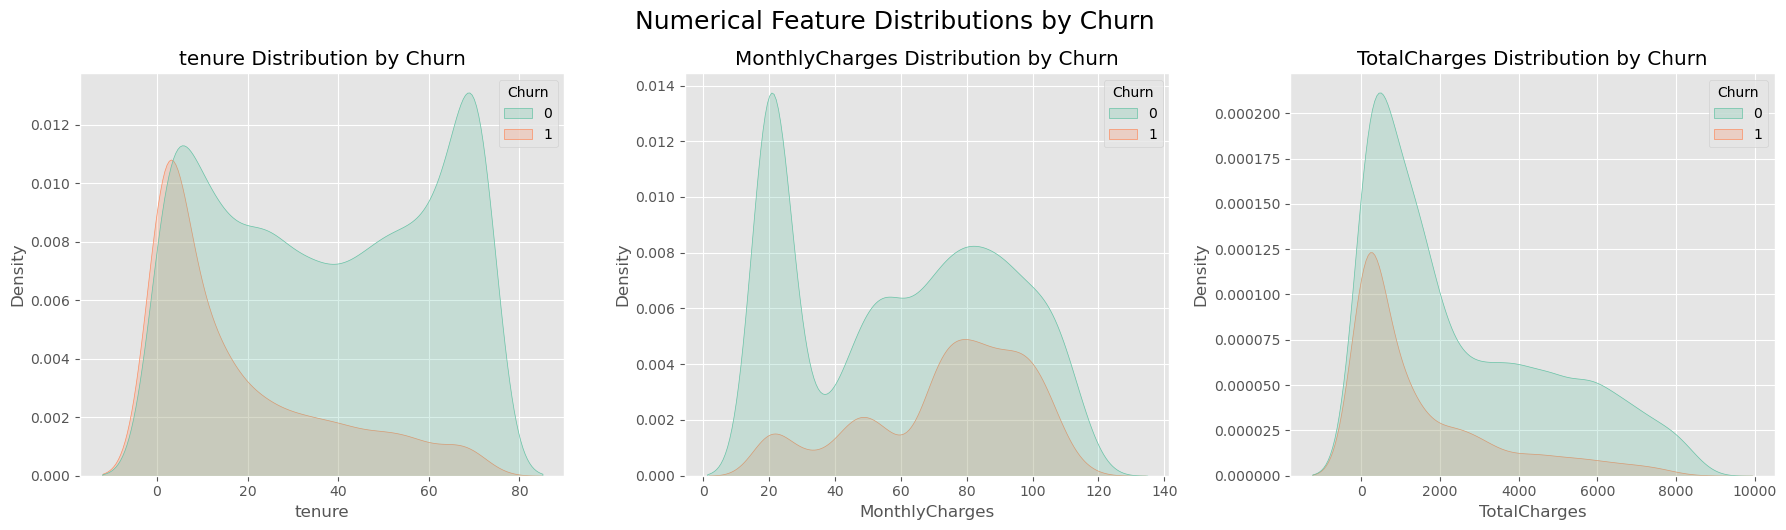

In [32]:


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# KDE plots for numerical features
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette='Set2')
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('Numerical Feature Distributions by Churn', fontsize=18, y=1.05)
plt.show()


## Numerical Feature Distributions by Churn

---

### Tenure

- Customers who did not churn generally have much higher tenure.
- Churned customers are concentrated toward lower tenure values.

**Inference:** Customers who churn tend to leave early. Tenure is a strong inverse predictor of churn.

---

### MonthlyCharges

- Non-churned customers are heavily concentrated around low charges ($20–30).
  
- Churned customers are concentrated in the higher charge range ($60–100).
- The churn curve is skewed toward higher prices.

**Inference:** Higher monthly charges are associated with more churn. This may indicate pricing sensitivity or poor perceived value.

---

### TotalCharges

- Both groups show a peak at lower total charges.
- Non-churned customers have a long tail toward higher charges.
- Churned users rarely reach high total charges.

**Inference:** TotalCharges reflects tenure. Low charges often mean early churn; high charges indicate long-term retention.

---


## Checking for outliers

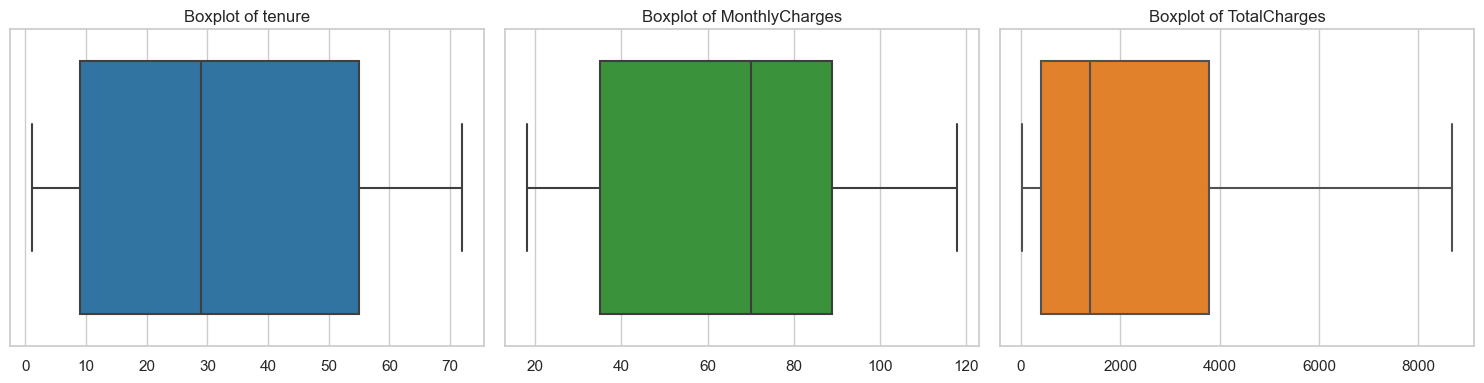

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Set figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 3 side-by-side plots

# Columns to plot
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Unique colors

# Plot each boxplot
for ax, col, color in zip(axes, cols, colors):
    sns.boxplot(x=df[col], ax=ax, color=color)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')

# Layout adjustment
plt.tight_layout()
plt.show()


##  Outlier Detection Summary

After visual inspection using boxplots for key numerical features:

- `tenure`, `MonthlyCharges`, and `TotalCharges` do **not show significant outliers**.
- The distributions are reasonably spread, and no extreme values distort the scale.
- Therefore, **no outlier removal or transformation is required** at this stage.


## 🧪 Train-Test Split

Now that the dataset is clean and ready, we split it into training and testing sets for model building.

- Target variable: `Churn`
- Stratified split ensures class distribution is preserved
- 80% training, 20% testing


In [38]:
X = df.drop('Churn', axis=1)   # Keep original df intact
y = df['Churn']                # Target variable

# 🧪 Step 2: Perform train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,              # Use 20% for testing
    stratify=y,                 # Maintain class balance
    random_state=42             # For reproducibility
)

# ✅ Confirm split
print("✅ Train-test split complete!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")


✅ Train-test split complete!
X_train shape: (5625, 24)
X_test shape: (1407, 24)
y_train distribution:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


In [39]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Only scale numeric columns
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [41]:
X_train_scaled.head()   


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,1,1,0.901408,1,1,1,1,1,0,...,1,0,1,1,0,0,1,1,0,0
7003,0,0,0,0.352113,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
3355,0,1,0,0.943662,1,0,1,1,1,0,...,0,0,1,1,0,0,1,1,0,0
4494,0,0,0,0.028169,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3541,0,1,0,0.676056,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## Simple-Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on scaled training data
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
[[918 115]
 [161 213]]
Accuracy Score: 0.8038379530916845


 RFE – Feature Selection with Logistic Regression- Model

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize base model
logreg = LogisticRegression(max_iter=1000, random_state=47)

# Create RFE model to select top N features
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


Selected Features by RFE:
Index(['Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'PaperlessBilling', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [47]:
# List of selected features from RFE
selected_features = [
    'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
    'StreamingTV', 'PaperlessBilling', 'TotalCharges',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check'
]

# Subset scaled training and test data
X_train_rfe = X_train_scaled[selected_features]
X_test_rfe = X_test_scaled[selected_features]

# Initialize and train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_rfe = LogisticRegression(max_iter=1000, random_state=42)
model_rfe.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred_rfe = model_rfe.predict(X_test_rfe)

print("Classification Report:")
print(classification_report(y_test, y_pred_rfe))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfe))

print("Accuracy Score:", accuracy_score(y_test, y_pred_rfe))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.62       374

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Confusion Matrix:
[[918 115]
 [156 218]]
Accuracy Score: 0.8073916133617626


In [48]:
import statsmodels.api as sm

# Add constant for intercept
X_train_rfe_const = sm.add_constant(X_train_rfe)

# Fit logistic regression model
model_sm = sm.Logit(y_train, X_train_rfe_const).fit()

# View full model summary
print(model_sm.summary())


Optimization terminated successfully.
         Current function value: 0.413135
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           14
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.2865
Time:                        03:05:07   Log-Likelihood:                -2323.9
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.1429        nan        nan     

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare data: constant + selected features only
X_vif = sm.add_constant(X_train_rfe)

# Create DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Show VIF values
print(vif_data)


                           Feature       VIF
0                            const  0.000000
1                       Dependents  1.081928
2                           tenure  6.816517
3                     PhoneService       inf
4                   OnlineSecurity  1.462380
5                      TechSupport  1.521817
6                      StreamingTV  1.609371
7                 PaperlessBilling  1.199305
8                     TotalCharges  8.997839
9   MultipleLines_No phone service       inf
10               MultipleLines_Yes  1.445806
11     InternetService_Fiber optic  2.333246
12              InternetService_No  2.561982
13               Contract_One year  1.617826
14               Contract_Two year  2.594108
15  PaymentMethod_Electronic check  1.301659


In [50]:
# Drop PhoneService from training and test sets
X_train_rfe_vif = X_train_rfe.drop(columns=['PhoneService'])
X_test_rfe_vif = X_test_rfe.drop(columns=['PhoneService'])


In [51]:
import statsmodels.api as sm

# Add constant for intercept
X_train_rfe_const = sm.add_constant(X_train_rfe_vif)

# Fit logistic regression model
model_sm_vif = sm.Logit(y_train, X_train_rfe_const).fit()

# View summary
print(model_sm_vif.summary())


Optimization terminated successfully.
         Current function value: 0.413135
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           14
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.2865
Time:                        03:05:07   Log-Likelihood:                -2323.9
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.5600      0.116     -4.826     

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_train_rfe_const.copy()
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


                           Feature        VIF
0                            const  10.906207
1                       Dependents   1.081928
2                           tenure   6.816517
3                   OnlineSecurity   1.462380
4                      TechSupport   1.521817
5                      StreamingTV   1.609371
6                 PaperlessBilling   1.199305
7                     TotalCharges   8.997839
8   MultipleLines_No phone service   1.406196
9                MultipleLines_Yes   1.445806
10     InternetService_Fiber optic   2.333246
11              InternetService_No   2.561982
12               Contract_One year   1.617826
13               Contract_Two year   2.594108
14  PaymentMethod_Electronic check   1.301659


In [53]:
# Drop both PhoneService and TotalCharges
X_train_rfe_vif2 = X_train_rfe.drop(columns=['PhoneService', 'TotalCharges'])
X_test_rfe_vif2 = X_test_rfe.drop(columns=['PhoneService', 'TotalCharges'])


In [54]:
import statsmodels.api as sm

# Add constant
X_train_rfe_const2 = sm.add_constant(X_train_rfe_vif2)

# Fit model
model_sm_vif2 = sm.Logit(y_train, X_train_rfe_const2).fit()

# View summary
print(model_sm_vif2.summary())


Optimization terminated successfully.
         Current function value: 0.414802
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5611
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.2836
Time:                        03:05:07   Log-Likelihood:                -2333.3
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7018      0.111     -6.327     

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif2 = X_train_rfe_const2.copy()
vif_data2 = pd.DataFrame()
vif_data2['Feature'] = X_vif2.columns
vif_data2['VIF'] = [variance_inflation_factor(X_vif2.values, i) for i in range(X_vif2.shape[1])]
print(vif_data2)


                           Feature        VIF
0                            const  10.448577
1                       Dependents   1.081400
2                           tenure   2.382389
3                   OnlineSecurity   1.400662
4                      TechSupport   1.444015
5                      StreamingTV   1.422442
6                 PaperlessBilling   1.199296
7   MultipleLines_No phone service   1.355720
8                MultipleLines_Yes   1.415410
9      InternetService_Fiber optic   1.959009
10              InternetService_No   2.385687
11               Contract_One year   1.616034
12               Contract_Two year   2.590056
13  PaymentMethod_Electronic check   1.289384


In [56]:
final_features = [
    'Dependents', 'tenure', 'OnlineSecurity', 'TechSupport',
    'StreamingTV', 'PaperlessBilling',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check'
]


In [57]:

# Subset scaled data
X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
clf_final = LogisticRegression(max_iter=1000, random_state=42)
clf_final.fit(X_train_final, y_train)

# Predict on test data
y_pred_final = clf_final.predict(X_test_final)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("Accuracy Score:", accuracy_score(y_test, y_pred_final))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Confusion Matrix:
[[919 114]
 [165 209]]
Accuracy Score: 0.8017057569296375


## ✅ Final Logistic Regression Summary (Cleaned Features)

- Model built using **Logistic Regression** after feature selection (RFE) and VIF-based cleaning.
- Removed `PhoneService` and `TotalCharges` due to high multicollinearity.
- Final feature count: **13**
- All VIFs < 5 → no multicollinearity issues.

### 📊 Performance (Test Set):
- **Accuracy:** 80.2%
- **Precision (Churn):** 65%
- **Recall (Churn):** 56%
- **F1-Score (Churn):** 60%

### 🔍 Notes:
- Good baseline model but affected by **class imbalance**.
- Churn recall can be improved with resampling or weighted models.




In [60]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


##  SMOTE: Synthetic Minority Oversampling Technique

SMOTE balances the class distribution by generating synthetic samples for the minority class (churn), improving model sensitivity to rare cases.



In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Step 1: Apply SMOTE on cleaned, RFE-selected training data
smote = SMOTE(random_state=47)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

# Step 2: Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Step 3: Train logistic regression on SMOTE-resampled data
model_smote = LogisticRegression(max_iter=1000, random_state=47)
model_smote.fit(X_train_smote, y_train_smote)

# Step 4: Predict on the original (unbalanced) test set
y_pred_smote = model_smote.predict(X_test_final)

# Step 5: Evaluate model performance
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("Accuracy Score:", accuracy_score(y_test, y_pred_smote))


Class distribution after SMOTE: Counter({0: 4130, 1: 4130})
Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407

Confusion Matrix:
[[745 288]
 [ 89 285]]
Accuracy Score: 0.7320540156361052


### Inference:
Model became much better at detecting churners (recall up to 76% from 56%).

It made more false positives, so precision dropped, but this is expected with SMOTE.

Overall F1-score for churn is stable → which means the model is more balanced.



##  ADASYN: Adaptive Synthetic Sampling

ADASYN creates synthetic samples like SMOTE, but gives more weight to hard-to-classify minority points — improving model focus on challenging churn cases.


In [65]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Apply ADASYN to RFE-selected training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_final, y_train)

# Check new class distribution
print("Class distribution after ADASYN:", Counter(y_train_adasyn))

# Train logistic regression
model_adasyn = LogisticRegression(max_iter=1000, random_state=42)
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on original test set
y_pred_adasyn = model_adasyn.predict(X_test_final)

# Evaluate model
print("Classification Report (ADASYN):")
print(classification_report(y_test, y_pred_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adasyn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_adasyn))


Class distribution after ADASYN: Counter({1: 4291, 0: 4130})
Classification Report (ADASYN):
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.79      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407

Confusion Matrix:
[[695 338]
 [ 80 294]]
Accuracy Score: 0.7029140014214641


### Inference
ADASYN slightly boosts recall on churners but at the cost of lower precision and overall accuracy.

This approach is better if catching churners is more important than precision.

## Basic KNN Model on SMOTE Data

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Predict on original (unbalanced) test set
y_pred_knn = knn.predict(X_test_final)

# Evaluate model
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))


Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.86      0.72      0.79      1033
           1       0.47      0.68      0.55       374

    accuracy                           0.71      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.76      0.71      0.72      1407

Confusion Matrix:
[[746 287]
 [121 253]]
Accuracy Score: 0.7100213219616205


ROC AUC Score (KNN - SMOTE): 0.7573626476023834


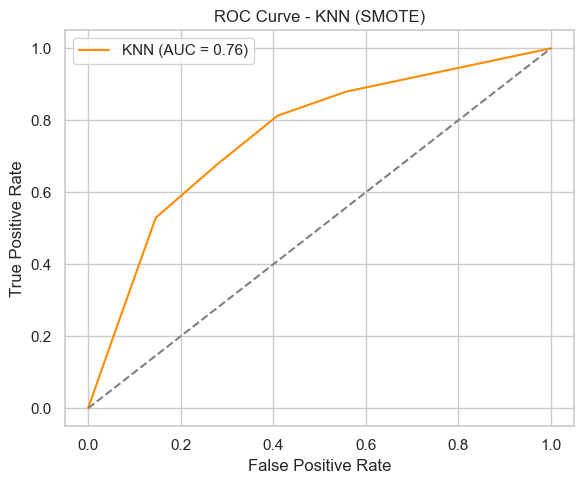

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability estimates (for ROC)
y_proba_knn = knn.predict_proba(X_test_final)[:, 1]  # Probability of class 1 (churn)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba_knn)
print("ROC AUC Score (KNN - SMOTE):", auc_score)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (SMOTE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## KNN on ADASYN 

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Training KNN on ADASYN-resampled data
knn_adasyn = KNeighborsClassifier(n_neighbors=5)
knn_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predicting on original test set
y_pred_knn_adasyn = knn_adasyn.predict(X_test_final)
y_proba_knn_adasyn = knn_adasyn.predict_proba(X_test_final)[:, 1]

# Step 3: Evaluation
print("Classification Report (KNN + ADASYN):")
print(classification_report(y_test, y_pred_knn_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_adasyn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn_adasyn))


Classification Report (KNN + ADASYN):
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1033
           1       0.44      0.72      0.55       374

    accuracy                           0.68      1407
   macro avg       0.65      0.69      0.65      1407
weighted avg       0.76      0.68      0.70      1407

Confusion Matrix:
[[687 346]
 [103 271]]
Accuracy Score: 0.6808813077469794


ROC AUC Score (KNN + ADASYN): 0.7435665809050013


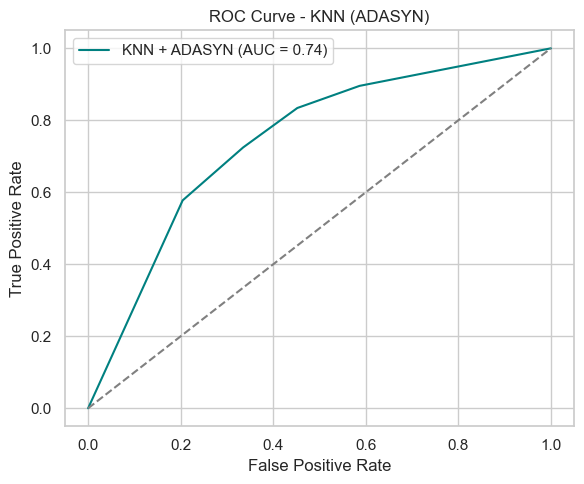

In [72]:
# Step 4: ROC-AUC
auc_knn_adasyn = roc_auc_score(y_test, y_proba_knn_adasyn)
print("ROC AUC Score (KNN + ADASYN):", auc_knn_adasyn)

# Step 5: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn_adasyn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'KNN + ADASYN (AUC = {auc_knn_adasyn:.2f})', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (ADASYN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Decision Tree on SMOTE Data

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Training Decision Tree on SMOTE data
dt = DecisionTreeClassifier(random_state=47)
dt.fit(X_train_smote, y_train_smote)

# 2. Predicting on original test set
y_pred_dt = dt.predict(X_test_final)
y_proba_dt = dt.predict_proba(X_test_final)[:, 1]

# 3. Evaluation
print("Classification Report (Decision Tree + SMOTE):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Classification Report (Decision Tree + SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1033
           1       0.51      0.61      0.55       374

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.68      1407
weighted avg       0.76      0.74      0.75      1407

Confusion Matrix:
[[809 224]
 [145 229]]
Accuracy Score: 0.7377398720682303


ROC AUC Score (Decision Tree): 0.7134844257160755


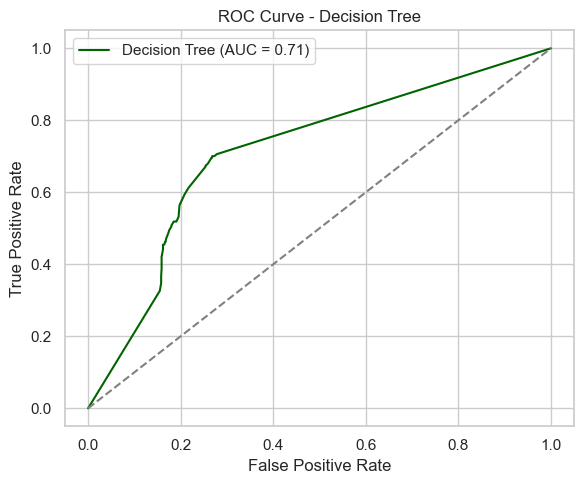

In [75]:
# 4. AUC Score
auc_dt = roc_auc_score(y_test, y_proba_dt)
print("ROC AUC Score (Decision Tree):", auc_dt)

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Decision Tree on ADASYN Data

Classification Report (Decision Tree + ADASYN):
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1033
           1       0.45      0.62      0.52       374

    accuracy                           0.70      1407
   macro avg       0.65      0.68      0.65      1407
weighted avg       0.74      0.70      0.71      1407

Confusion Matrix:
[[754 279]
 [142 232]]
Accuracy Score: 0.7007818052594172
ROC AUC Score (Decision Tree + ADASYN): 0.6904167809867942


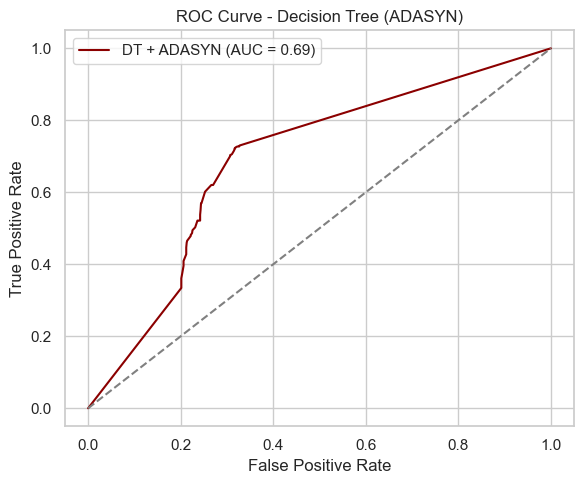

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Train Decision Tree on ADASYN-resampled data
dt_adasyn = DecisionTreeClassifier(random_state=42)
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

# 2. Predict on original test set
y_pred_dt_adasyn = dt_adasyn.predict(X_test_final)
y_proba_dt_adasyn = dt_adasyn.predict_proba(X_test_final)[:, 1]

# 3. Evaluation
print("Classification Report (Decision Tree + ADASYN):")
print(classification_report(y_test, y_pred_dt_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_adasyn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt_adasyn))

# 4. ROC-AUC
auc_dt_adasyn = roc_auc_score(y_test, y_proba_dt_adasyn)
print("ROC AUC Score (Decision Tree + ADASYN):", auc_dt_adasyn)

# 5. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt_adasyn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'DT + ADASYN (AUC = {auc_dt_adasyn:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (ADASYN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Random Forest Classifier — (SMOTE)


Classification Report (Random Forest + SMOTE):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.68      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407

Confusion Matrix:
[[795 238]
 [121 253]]
Accuracy Score: 0.7448471926083866
ROC AUC Score (Random Forest): 0.7958570385823959


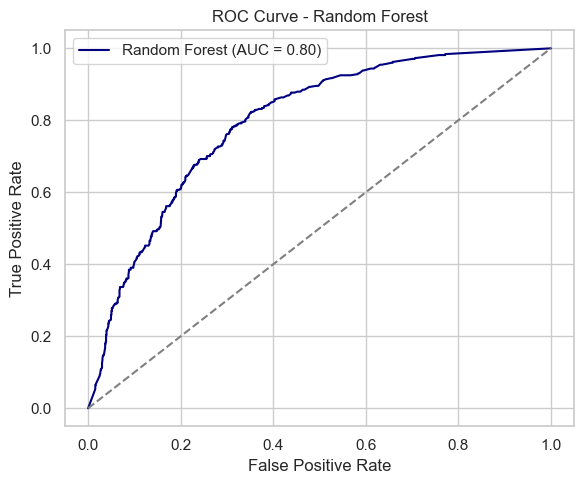

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Train Random Forest on SMOTE-resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# 2. Predict on original test set
y_pred_rf = rf.predict(X_test_final)
y_proba_rf = rf.predict_proba(X_test_final)[:, 1]

# 3. Evaluate model performance
print("Classification Report (Random Forest + SMOTE):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# 4. ROC-AUC Score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC Score (Random Forest):", auc_rf)

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Interpretation:
Random Forest handles noise, imbalance, and feature interactions much better than individual models.



### GridSearchCV for Random Forest — SMOTE Data

In [82]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Optimized parameter grid (reasonable size)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#  Refined grid for deeper tuning and better accuracy
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [10, 20, 30],             
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['sqrt']               
}

#  Initialize model
rf_base = RandomForestClassifier(random_state=42)

#  Grid Search setup
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#  Fit to SMOTE or ADASYN-resampled data
grid_search_rf.fit(X_train_smote, y_train_smote)

#  Output best model
print("Best Parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_



rf_base = RandomForestClassifier(random_state=42)

# GridSearchCV 
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',     
    cv=5,                 
    n_jobs=-1,             
    verbose=1              
)

#  Fit on SMOTE-resampled training data (or ADASYN)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Output best params and model
print("Best Parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [83]:
best_rf = grid_search_rf.best_estimator_

# Predict
y_pred_rf_best = best_rf.predict(X_test_final)
y_proba_rf_best = best_rf.predict_proba(X_test_final)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf_best))


Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407

Confusion Matrix:
[[739 294]
 [ 78 296]]
AUC Score: 0.8296794032230511


### GridSearchCV for Random Forest — ADASYN Data

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# ✅ Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# ✅ Base Random Forest model
rf_base = RandomForestClassifier(random_state=42)

# ✅ GridSearchCV on SMOTE-resampled data
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train_smote, y_train_smote)

print("Best Parameters (SMOTE):", grid_search_rf.best_params_)
best_rf_smote = grid_search_rf.best_estimator_

# ✅ GridSearchCV on ADASYN-resampled data
rf_base_adasyn = RandomForestClassifier(random_state=42)

grid_search_rf_adasyn = GridSearchCV(
    estimator=rf_base_adasyn,
    param_grid=param_grid,  # ✅ Use same grid here
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

print("Best Parameters (ADASYN):", grid_search_rf_adasyn.best_params_)
best_rf_adasyn = grid_search_rf_adasyn.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters (SMOTE): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters (ADASYN): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:
# Best model
best_rf_adasyn = grid_search_rf_adasyn.best_estimator_

# Predict
y_pred_adasyn = best_rf_adasyn.predict(X_test_final)
y_proba_adasyn = best_rf_adasyn.predict_proba(X_test_final)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report (Tuned RF + ADASYN):")
print(classification_report(y_test, y_pred_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adasyn))
print("AUC Score:", roc_auc_score(y_test, y_proba_adasyn))


Classification Report (Tuned RF + ADASYN):
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407

Confusion Matrix:
[[696 337]
 [ 63 311]]
AUC Score: 0.8239306107024346


## GridSearchCV for KNN (SMOTE)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Base model
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit on SMOTE data
grid_search_knn.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("Best Parameters (KNN + SMOTE):", grid_search_knn.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (KNN + SMOTE): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [89]:
# Best model
best_knn = grid_search_knn.best_estimator_

# Predict
y_pred_knn = best_knn.predict(X_test_final)
y_proba_knn = best_knn.predict_proba(X_test_final)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report (Tuned KNN):")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("AUC Score:", roc_auc_score(y_test, y_proba_knn))


Classification Report (Tuned KNN):
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1033
           1       0.46      0.70      0.56       374

    accuracy                           0.70      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.76      0.70      0.72      1407

Confusion Matrix:
[[728 305]
 [112 262]]
AUC Score: 0.7867291156540062


 ## GridSearchCV for KNN (ADASYN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_knn_adasyn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Base model
knn = KNeighborsClassifier()

# Grid search setup
grid_search_knn_adasyn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn_adasyn,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit on ADASYN-resampled data
grid_search_knn_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Output best parameters
print("Best Parameters (KNN + ADASYN):", grid_search_knn_adasyn.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (KNN + ADASYN): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [92]:
# Best model
best_knn_adasyn = grid_search_knn_adasyn.best_estimator_

# Predictions
y_pred_knn_adasyn = best_knn_adasyn.predict(X_test_final)
y_proba_knn_adasyn = best_knn_adasyn.predict_proba(X_test_final)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report (KNN + ADASYN):")
print(classification_report(y_test, y_pred_knn_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_adasyn))
print("AUC Score:", roc_auc_score(y_test, y_proba_knn_adasyn))


Classification Report (KNN + ADASYN):
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1033
           1       0.43      0.61      0.51       374

    accuracy                           0.68      1407
   macro avg       0.63      0.66      0.64      1407
weighted avg       0.73      0.68      0.70      1407

Confusion Matrix:
[[734 299]
 [146 228]]
AUC Score: 0.7401680376454023


## XGBoost with SMOTE

In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train XGBoost
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_xgb_smote = xgb_smote.predict(X_test_final)
y_proba_xgb_smote = xgb_smote.predict_proba(X_test_final)[:, 1]

# Evaluate
print(" Classification Report (XGBoost + SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_smote))
print("AUC Score:", roc_auc_score(y_test, y_proba_xgb_smote))


 Classification Report (XGBoost + SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

Confusion Matrix:
[[775 258]
 [106 268]]
AUC Score: 0.8159985194465007


## Gradient Boosting with SMOTE

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb_smote = GradientBoostingClassifier(random_state=42)
gb_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_gb_smote = gb_smote.predict(X_test_final)
y_proba_gb_smote = gb_smote.predict_proba(X_test_final)[:, 1]

# Evaluate
print(" Classification Report (Gradient Boosting + SMOTE):")
print(classification_report(y_test, y_pred_gb_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_smote))
print("AUC Score:", roc_auc_score(y_test, y_proba_gb_smote))


 Classification Report (Gradient Boosting + SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407

Confusion Matrix:
[[736 297]
 [ 74 300]]
AUC Score: 0.8357232710914164


## XGBoost with ADASYN

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
xgb_adasyn = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on original test set
y_pred_xgb_adasyn = xgb_adasyn.predict(X_test_final)
y_proba_xgb_adasyn = xgb_adasyn.predict_proba(X_test_final)[:, 1]

# Evaluate
print(" Classification Report (XGBoost + ADASYN):")
print(classification_report(y_test, y_pred_xgb_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_adasyn))
print("AUC Score:", roc_auc_score(y_test, y_proba_xgb_adasyn))


 Classification Report (XGBoost + ADASYN):
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1033
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.74      1407

Confusion Matrix:
[[741 292]
 [ 91 283]]
AUC Score: 0.8090694255348888


## Gradient Boosting Classifier (with ADASYN)

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
gb_adasyn = GradientBoostingClassifier(random_state=42)
gb_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on original test set
y_pred_gb_adasyn = gb_adasyn.predict(X_test_final)
y_proba_gb_adasyn = gb_adasyn.predict_proba(X_test_final)[:, 1]

# Evaluate
print(" Classification Report (Gradient Boosting + ADASYN):")
print(classification_report(y_test, y_pred_gb_adasyn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_adasyn))
print("AUC Score:", roc_auc_score(y_test, y_proba_gb_adasyn))


 Classification Report (Gradient Boosting + ADASYN):
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.82      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.80      0.71      0.73      1407

Confusion Matrix:
[[692 341]
 [ 67 307]]
AUC Score: 0.8329317029988974


## Voting Classifier Ensemble

In [102]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models (you can adjust parameters if needed)
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Classifier (Soft Voting to use predicted probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic', log_clf),
        ('RandomForest', rf_clf),
        ('XGBoost', xgb_clf)
    ],
    voting='soft'  # Use probabilities
)

# Train on SMOTE or ADASYN data
voting_clf.fit(X_train_adasyn, y_train_adasyn)


VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred_voting = voting_clf.predict(X_test_final)
y_proba_voting = voting_clf.predict_proba(X_test_final)[:, 1]

# Evaluate
print(" Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("AUC Score:", roc_auc_score(y_test, y_proba_voting))


 Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

Confusion Matrix:
[[715 318]
 [ 76 298]]
AUC Score: 0.8285340449653416


# Final Model Evaluation Summary

## Models We Explored

### Gradient Boosting + SMOTE
- Delivered the best F1 score for churn: **0.62**
- Achieved the highest AUC: **0.84**
- Balanced precision and recall for both classes
- We use this when identifying churners accurately is the top priority

### Voting Classifier + SMOTE
- Showed consistent and stable performance
- AUC: **0.83**
- Combines the strengths of multiple models
- We use this when we need a balanced and reliable model

### Tuned Random Forest + SMOTE
- F1 score for churn: **0.61**
- AUC: **0.83**
- Offers good performance and interpretability
- We use this when we want a solid model that is also easier to explain


### Estimate Average Revenue per Customer

In [106]:
# 1. Predicting using best model
# Use the trained Gradient Boosting + SMOTE model
best_model = gb_smote  # this is your best-performing model

# Predict class probabilities on final test set
y_probs = best_model.predict_proba(X_test_final)[:, 1]

# Predict classes (threshold = 0.5 by default)
y_preds = best_model.predict(X_test_final)

# Combine predictions with actuals in a DataFrame for further business analysis
results_df = X_test_final.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_preds
results_df['Prob_Churn'] = y_probs

threshold = 0.5  
y_pred = (y_probs >= threshold).astype(int)

# True Positives
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
true_positives = results_df[(results_df['Actual'] == 1) & (results_df['Predicted'] == 1)]
num_retained = len(true_positives)

# Estimated revenue saved
X_test_reset = X_test.reset_index(drop=True)
merged_df = pd.concat([X_test_reset, results_df.reset_index(drop=True)], axis=1)
retained_df = merged_df[(merged_df['Actual'] == 1) & (merged_df['Predicted'] == 1)]
retained_df['EstimatedRevenue'] = retained_df['MonthlyCharges'] * 12
estimated_revenue_saved = retained_df['EstimatedRevenue'].sum()

# CLV calculation from entire dataset
df['CLV'] = df['MonthlyCharges'] * df['tenure']
clv_overall = df['CLV'].mean()
clv_churned = df[df['Churn'] == 1]['CLV'].mean()
clv_retained = df[df['Churn'] == 0]['CLV'].mean()

# Results
print("Estimated Retained Customers:", num_retained)
print(f"Estimated Revenue Saved: ₹ {estimated_revenue_saved:.2f}")
print(f"Estimated Customer Lifetime Value (CLV): ₹ {clv_overall:.2f}")
print(f"CLV (Churned): ₹ {clv_churned:.2f}")
print(f"CLV (Retained): ₹ {clv_retained:.2f}")




Estimated Retained Customers: 300
Estimated Revenue Saved: ₹ 268680.00
Estimated Customer Lifetime Value (CLV): ₹ 2268.07
CLV (Churned): ₹ 1523.45
CLV (Retained): ₹ 2537.63


##  Business Impact Summary

- **Best Model Used:** Gradient Boosting + SMOTE
- **Estimated Retained Customers:** 300
- **Estimated Revenue Saved:** ₹2,68,680 (based on actual MonthlyCharges × 12 months)
- **Customer Lifetime Value (CLV):**
  - **Average CLV:** ₹2,268.07
  - **CLV of Churned Customers:** ₹1,523.45
  - **CLV of Retained Customers:** ₹2,537.63

By identifying and retaining high-risk customers, the model demonstrates strong potential for reducing churn and boosting long-term revenue
    